In [183]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [184]:
#Reading the data
cereals = pd.read_csv("C:/Users/DELL/Desktop/R installation and Its Programs/Clustering/20180902_Batch49_CSE7315c_Day01_Stats_Datasets/Cereals.csv")
cereals.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [185]:
# Assiging the names column to the Rownames for good labeling .
cereals.index = cereals["name"]

In [186]:
list(cereals.index)

['100%_Bran',
 '100%_Natural_Bran',
 'All-Bran',
 'All-Bran_with_Extra_Fiber',
 'Almond_Delight',
 'Apple_Cinnamon_Cheerios',
 'Apple_Jacks',
 'Basic_4',
 'Bran_Chex',
 'Bran_Flakes',
 "Cap'n'Crunch",
 'Cheerios',
 'Cinnamon_Toast_Crunch',
 'Clusters',
 'Cocoa_Puffs',
 'Corn_Chex',
 'Corn_Flakes',
 'Corn_Pops',
 'Count_Chocula',
 "Cracklin'_Oat_Bran",
 'Cream_of_Wheat_(Quick)',
 'Crispix',
 'Crispy_Wheat_&_Raisins',
 'Double_Chex',
 'Froot_Loops',
 'Frosted_Flakes',
 'Frosted_Mini-Wheats',
 'Fruit_&_Fibre_Dates,_Walnuts,_and_Oats',
 'Fruitful_Bran',
 'Fruity_Pebbles',
 'Golden_Crisp',
 'Golden_Grahams',
 'Grape_Nuts_Flakes',
 'Grape-Nuts',
 'Great_Grains_Pecan',
 'Honey_Graham_Ohs',
 'Honey_Nut_Cheerios',
 'Honey-comb',
 'Just_Right_Crunchy__Nuggets',
 'Just_Right_Fruit_&_Nut',
 'Kix',
 'Life',
 'Lucky_Charms',
 'Maypo',
 'Muesli_Raisins,_Dates,_&_Almonds',
 'Muesli_Raisins,_Peaches,_&_Pecans',
 'Mueslix_Crispy_Blend',
 'Multi-Grain_Cheerios',
 'Nut&Honey_Crunch',
 'Nutri-Grain_Almond-

In [187]:
cereals.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,
100%_Bran,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
100%_Natural_Bran,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
All-Bran,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
Almond_Delight,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [188]:
#Dropping the names column as we have assigned the names column to the Rownmes 
numeric_vars = cereals.drop(['name'],axis=1)

In [189]:
numeric_vars.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,
100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [190]:
#deleting the header of the Rownames "name", to look data nice with out confusion.
del numeric_vars.index.name

In [191]:
numeric_vars.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [192]:
#Checking the sum of null values 
numeric_vars.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [193]:
#Columns with null values 
numeric_vars.iloc[:,[6,7,8]] 
#numeric_vars.head()

,sugars,potass,vitamins
100%_Bran,6.0,280.0,25
100%_Natural_Bran,8.0,135.0,0
All-Bran,5.0,320.0,25
All-Bran_with_Extra_Fiber,0.0,330.0,25
Almond_Delight,8.0,NaN,25
Apple_Cinnamon_Cheerios,10.0,70.0,25
Apple_Jacks,14.0,30.0,25
Basic_4,8.0,100.0,25
Bran_Chex,6.0,125.0,25
Bran_Flakes,5.0,190.0,25


In [194]:
numeric_vars.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [195]:
#Imputation to impute the null values 
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(strategy="mean")
mean_imputer.fit(numeric_vars)
imputed_numeric_vars = pd.DataFrame(mean_imputer.fit_transform(numeric_vars),columns=numeric_vars.columns.values)

In [196]:
#After imputation we could see no null values 
imputed_numeric_vars.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [197]:
#After imputation we could see rownameds as numeric values , assigning them back to names 
imputed_numeric_vars.index = cereals["name"]

In [198]:
#deleting the header of the rownames 
del imputed_numeric_vars.index.name

In [199]:
imputed_numeric_vars.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100%_Bran,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.000000,25.0,3.0,1.0,0.33,68.402973
100%_Natural_Bran,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,0.0,3.0,1.0,1.00,33.983679
All-Bran,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.000000,25.0,3.0,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.000000,25.0,3.0,1.0,0.50,93.704912
Almond_Delight,110.0,2.0,2.0,200.0,1.0,14.0,8.0,98.666667,25.0,3.0,1.0,0.75,34.384843


In [200]:
imputed_numeric_vars.iloc[:,[6,7,8]] 
#numeric_vars.head()

,sugars,potass,vitamins
100%_Bran,6.000000,280.000000,25.0
100%_Natural_Bran,8.000000,135.000000,0.0
All-Bran,5.000000,320.000000,25.0
All-Bran_with_Extra_Fiber,0.000000,330.000000,25.0
Almond_Delight,8.000000,98.666667,25.0
Apple_Cinnamon_Cheerios,10.000000,70.000000,25.0
Apple_Jacks,14.000000,30.000000,25.0
Basic_4,8.000000,100.000000,25.0
Bran_Chex,6.000000,125.000000,25.0
Bran_Flakes,5.000000,190.000000,25.0


In [201]:
# Divide  data in to train and test
  
X_train, X_test= train_test_split(imputed_numeric_vars, test_size=0.150) 

In [202]:
print(X_train.shape)
print(X_test.shape)

(65, 13)
(12, 13)


In [203]:
imputed_numeric_vars.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100%_Bran,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.000000,25.0,3.0,1.0,0.33,68.402973
100%_Natural_Bran,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,0.0,3.0,1.0,1.00,33.983679
All-Bran,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.000000,25.0,3.0,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.000000,25.0,3.0,1.0,0.50,93.704912
Almond_Delight,110.0,2.0,2.0,200.0,1.0,14.0,8.0,98.666667,25.0,3.0,1.0,0.75,34.384843


In [204]:
#Standarising the data 
std = StandardScaler()
std.fit(X_train)
X_train_std= std.transform(X_train)
X_test_std= std.transform(X_test)


In [205]:
X_train_std[0:5,:]

array([[ 0.734375  ,  0.44426166,  0.96362411,  0.03479457,  1.08930352,
        -0.68942027,  0.74647442,  1.37099292, -0.12011969,  0.94315157,
         1.553041  , -0.6384462 , -0.20284526],
       [ 0.2265625 , -0.51830527, -0.96362411,  1.4632031 , -0.9418132 ,
         1.73545416, -0.8558276 , -1.05952988, -0.12011969, -1.46096027,
        -0.15215604,  0.72692479, -0.16579782],
       [-0.28125   ,  0.44426166, -0.96362411, -1.86975014,  0.27685683,
        -0.20444538,  0.05977356, -0.01787725, -0.12011969, -0.25890435,
        -0.15215604, -0.10057278,  1.02007211],
       [ 0.2265625 , -0.51830527,  0.        ,  0.27286265, -0.9418132 ,
        -0.68942027,  1.204275  , -0.64286883, -0.12011969, -0.25890435,
        -0.15215604,  0.72692479, -1.19802378],
       [-0.7890625 ,  0.44426166, -0.96362411, -1.86975014,  0.68308017,
         1.00799183, -1.54252846,  0.53767082, -1.2355168 , -1.46096027,
        -0.15215604, -0.6384462 ,  2.15174931]])

In [206]:
X_train.index



Index(['Fruit_&_Fibre_Dates,_Walnuts,_and_Oats', 'Corn_Chex',
       'Frosted_Mini-Wheats', 'Lucky_Charms', 'Shredded_Wheat_'n'Bran',
       'Grape-Nuts', 'Total_Raisin_Bran', 'Puffed_Rice',
       'All-Bran_with_Extra_Fiber', 'Basic_4', 'Honey_Graham_Ohs',
       'Post_Nat._Raisin_Bran', 'Quaker_Oat_Squares', 'Frosted_Flakes',
       'Shredded_Wheat_spoon_size', 'Raisin_Bran', 'Raisin_Squares',
       'Cracklin'_Oat_Bran', 'Honey_Nut_Cheerios', 'Bran_Chex',
       'Nutri-grain_Wheat', 'Quaker_Oatmeal', 'Rice_Krispies', 'Smacks',
       'Muesli_Raisins,_Dates,_&_Almonds', 'Apple_Jacks', 'Cheerios', 'Life',
       'Oatmeal_Raisin_Crisp', 'Strawberry_Fruit_Wheats', 'Corn_Pops', 'Kix',
       'Cream_of_Wheat_(Quick)', 'Wheaties', 'Puffed_Wheat', 'Froot_Loops',
       'Total_Whole_Grain', 'Great_Grains_Pecan', 'Trix', 'Honey-comb',
       'Just_Right_Fruit_&_Nut', 'Total_Corn_Flakes',
       'Muesli_Raisins,_Peaches,_&_Pecans', '100%_Natural_Bran', 'All-Bran',
       'Cinnamon_Toast_Crunch

In [207]:
# KMeans clustering

In [208]:
# Number of clusters
kmeans = KMeans(n_clusters=6,random_state=148461)
# Fitting the input data
kmeans = kmeans.fit(X_train_std)
# Getting the cluster labels
labels = kmeans.predict(X_train_std)
# Centroid values
centroids = kmeans.cluster_centers_

In [209]:
labels

array([0, 1, 2, 3, 2, 2, 0, 5, 4, 0, 3, 0, 2, 3, 2, 0, 2, 0, 3, 2, 2, 2,
       1, 3, 0, 3, 2, 2, 0, 2, 3, 1, 2, 2, 5, 3, 1, 0, 3, 3, 0, 1, 0, 0,
       4, 3, 3, 1, 1, 2, 1, 1, 4, 3, 3, 2, 1, 1, 0, 2, 2, 0, 3, 3, 3])

In [210]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=148461, tol=0.0001, verbose=0)

In [211]:
# Getting the cluster labels for the test Data set
labels_test = kmeans.predict(X_test_std)


In [212]:
labels_test

array([0, 3, 2, 0, 3, 3, 3, 3, 3, 1, 0, 2])

In [213]:
labels

array([0, 1, 2, 3, 2, 2, 0, 5, 4, 0, 3, 0, 2, 3, 2, 0, 2, 0, 3, 2, 2, 2,
       1, 3, 0, 3, 2, 2, 0, 2, 3, 1, 2, 2, 5, 3, 1, 0, 3, 3, 0, 1, 0, 0,
       4, 3, 3, 1, 1, 2, 1, 1, 4, 3, 3, 2, 1, 1, 0, 2, 2, 0, 3, 3, 3])

In [214]:
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

[[ 1.13337054e+00  5.81771219e-01  1.17011499e+00 -4.59785346e-02
   3.92920644e-01 -1.69804322e-01  6.32024278e-01  8.25365350e-01
   2.78236423e-01  8.57290433e-01  1.12430574e+00 -4.28616461e-01
  -4.55212211e-01]
 [ 4.19034091e-02 -4.30799184e-01 -6.13215344e-01  1.09527969e+00
  -6.83307432e-01  1.38274515e+00 -8.55827596e-01 -7.43877567e-01
   7.92477948e-01 -4.03487303e-02 -1.52156044e-01  7.75822373e-01
  -9.85109148e-02]
 [-4.78732639e-01  6.04689479e-01 -3.74742710e-01 -5.53762651e-01
   2.24950516e-01  3.04813698e-01 -7.15609437e-01  1.19980972e-01
  -4.29952220e-01 -3.92466122e-01 -2.16574599e-01 -2.22398813e-01
   8.96152949e-01]
 [ 2.56433824e-01 -9.71277939e-01 -1.86879170e-17  9.43115887e-02
  -6.55067307e-01 -6.32364403e-01  1.09655722e+00 -7.24567073e-01
  -1.20119689e-01 -5.41741040e-01 -1.52156044e-01  3.20477453e-01
  -1.03137962e+00]
 [-2.14322917e+00  1.40682858e+00 -3.21208037e-01  2.33184640e-01
   3.52664357e+00 -1.98268664e+00 -7.03227404e-01  2.89875010e+00


In [215]:
# Inertia: Sum of squared distances of samples to their closest cluster center
wss= {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train_std)
    clusters = kmeans.labels_
    wss[k] = kmeans.inertia_ 
    

In [216]:
# Inertia
wss

{1: 845.0,
 2: 682.3464450078083,
 3: 567.4447245269346,
 4: 475.4785940233396,
 5: 395.12334788790406,
 6: 345.60123856953624,
 7: 308.47825221306425,
 8: 274.32058217865995,
 9: 242.80194168852023}

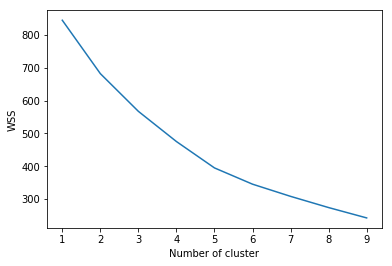

In [217]:
#Plot to figure out the best clusters 
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.show()

In [218]:
#adjusted_rand_score, to check the similarity of the clusters
from sklearn.metrics import adjusted_rand_score
import numpy as np

In [219]:
X_train_std=pd.DataFrame(X_train_std)

In [220]:
X_train_std.shape

(65, 13)

In [221]:
#to retrive the ramdom indices of the rows , as a part of test data
indices=X_train_std.sample(frac=0.9,random_state=1234).index
print(indices)

Int64Index([22, 32, 33,  8,  6, 56, 40, 20,  4, 21, 50, 54, 29, 18, 45, 55, 36,
            13, 25, 58, 64, 10,  7, 27, 14, 17, 46, 31, 35,  1, 42, 63,  2, 39,
            48, 61,  0, 11,  3, 62, 34, 37, 60,  9, 16,  5, 28, 59, 44, 51, 43,
            30, 26, 41, 23, 49, 15, 57],
           dtype='int64')


In [222]:
Alpha=X_train_std.iloc[indices,:]

In [223]:
#Test data
Alpha

,0,1,2,3,4,5,6,7,8,9,10,11,12
22,0.226563,-0.518305,-0.963624,1.582237,-0.941813,1.735454,-0.855828,-0.920643,-0.120120,-1.460960,-0.152156,0.726925,-0.227888
32,-0.281250,0.444262,-0.963624,-0.917478,-0.535590,1.492967,-1.542528,-0.036396,-1.235517,-0.258904,-0.152156,0.726925,1.454327
33,-0.281250,0.444262,0.000000,0.510931,0.276857,0.523017,-0.855828,0.121010,-0.120120,-1.460960,-0.152156,0.726925,0.546222
8,-2.820312,1.406829,-0.963624,-0.203274,4.745314,-1.659370,-1.542528,3.176524,-0.120120,0.943152,-0.152156,-1.341819,3.501243
6,1.750000,0.444262,0.000000,0.391897,0.683080,0.038042,1.662076,1.787654,3.226072,0.943152,3.258238,0.726925,-1.067630
56,-0.281250,-0.518305,-0.963624,1.582237,-0.535590,1.492967,-1.084728,-0.920643,-0.120120,-1.460960,-0.152156,0.726925,0.144232
40,1.750000,0.444262,0.000000,0.153829,-0.129367,1.250479,0.517574,-0.087321,3.226072,0.943152,1.894080,-0.307447,-0.514785
20,-0.789062,0.444262,-0.963624,0.153829,0.276857,0.765504,-1.084728,-0.156764,-0.120120,0.943152,-0.152156,0.726925,1.111131
4,-0.789062,0.444262,-0.963624,-1.869750,0.683080,1.007992,-1.542528,0.537671,-1.235517,-1.460960,-0.152156,-0.638446,2.151749
21,-0.281250,2.369396,0.963624,-1.869750,0.154990,-0.009817,0.065797,0.121010,-1.235517,-1.460960,-0.152156,-0.638446,0.492627


In [224]:
#Clustering on the train data
kmeans = KMeans(n_clusters=6)
kmeans1 = kmeans.fit(X_train_std)
print(len(kmeans1.labels_))
X_train_std['clus']=kmeans1.labels_

65


In [225]:
#Clustering on the sample (test data)
kmeans = KMeans(n_clusters=6)
kmeans2=kmeans.fit(Alpha)
print(len(kmeans2.labels_))
Alpha['clus']=kmeans2.labels_

58


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [226]:
Alpha.shape

(58, 14)

In [227]:
g1=X_train_std.loc[indices,'clus']
g2=Alpha.clus

In [231]:
# 91 percent the clusters are same in train and test 
adjusted_rand_score(g1,g2)


0.9130095384278041

In [232]:
g2

22    0
32    4
33    4
8     5
6     2
56    0
40    2
20    4
4     4
21    4
50    0
54    1
29    4
18    1
45    1
55    4
36    0
13    1
25    1
58    2
64    1
10    1
7     3
27    4
14    4
17    2
46    1
31    0
35    1
1     0
42    2
63    1
2     4
39    1
48    0
61    2
0     2
11    2
3     1
62    1
34    3
37    2
60    4
9     2
16    4
5     4
28    2
59    4
44    5
51    0
43    2
30    1
26    4
41    0
23    1
49    4
15    2
57    0
Name: clus, dtype: int32

In [233]:
g1


22    0
32    4
33    4
8     2
6     1
56    0
40    1
20    4
4     4
21    4
50    0
54    5
29    4
18    5
45    5
55    4
36    0
13    5
25    5
58    1
64    5
10    5
7     3
27    4
14    4
17    1
46    5
31    0
35    5
1     0
42    1
63    5
2     4
39    5
48    0
61    1
0     1
11    1
3     5
62    5
34    3
37    1
60    4
9     1
16    4
5     4
28    1
59    4
44    2
51    4
43    1
30    5
26    0
41    0
23    5
49    4
15    1
57    0
Name: clus, dtype: int32